# PDS Assignment 3:

**Problem statement : ** The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes (Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes PedigreeFunction, and Age) and 1 response variable (Outcome). The response variable, Outcome, has binary value (1 indicating the outcome is diabetes and 0 means no diabetes). For this assignment purposes we will consider this data as a population. Use this data to perform the following:

a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

b) Find the 98 percentile of BMI of your sample and the population and compare the results using charts

c) Using bootstrap (replace=True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for Blood Pressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings

So, as per the problem statement first we do the data explortion then we go and solve each task step by step

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load the diabetes dataset
data = pd.read_csv('diabetes.csv')
data.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


As of know we imported data and seen the values in it. Now, we proceed to solve the each task step by step

# **1st Task : **
set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

In [7]:
# Set a seed for reproducibility
seed = 40
np.random.seed(seed)

In [8]:
# Take a random sample of 25 observations
sample_size = 25
sample = data.sample(n=sample_size)

In [9]:
# Calculate mean and highest Glucose values for the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

In [11]:
# Calculate population mean and highest Glucose values
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

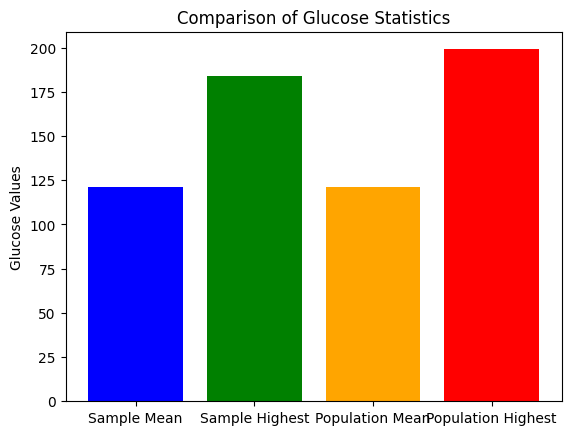

In [14]:
# Create a bar chart for comparison
labels = ['Sample Mean', 'Sample Highest', 'Population Mean', 'Population Highest']
values = [sample_mean_glucose, sample_highest_glucose, population_mean_glucose, population_highest_glucose]

plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

As of know I have completed the task 1 and now I proceed to the task 2 before that please find the above bar plot i.e.,Comparision of Gluscose Statistics in visualizations sections in pds assignment 3 github repository

# **2nd Task : **
Find the 98 percentile of BMI of your sample and the population and compare the results using charts

In [15]:
# Calculate the 98th percentile of BMI for the sample and population
sample_percentile_bmi = np.percentile(sample['BMI'], 98)
population_percentile_bmi = np.percentile(data['BMI'], 98)

In [16]:
# Create a bar chart for comparison
labels = ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI']
values = [sample_percentile_bmi, population_percentile_bmi]

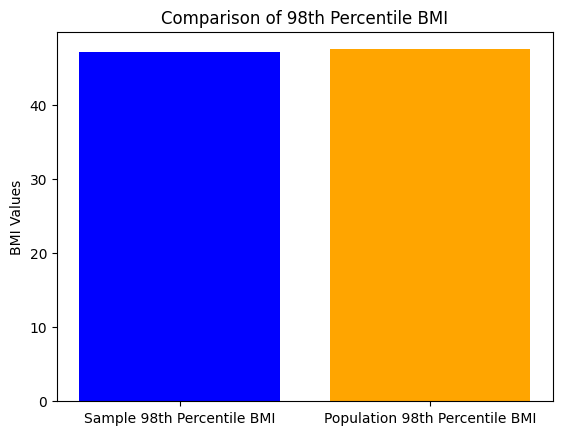

In [17]:
plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Values')
plt.show()

Before solving 3rd task please find the above bar plot in Comparsion of 98th Percentile BMI in visualizations sections in pds assignment 3 github repository

# **3rd Task: **
Using bootstrap (replace=True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for Blood Pressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings

In [18]:
# Number of bootstrap samples and sample size
num_bootstrap_samples = 500
bootstrap_sample_size = 150

In [19]:
# Function to calculate mean, standard deviation, and percentile for Blood Pressure
def calculate_statistics(data):
    mean_bp = np.mean(data['BloodPressure'])
    std_bp = np.std(data['BloodPressure'])
    percentile_95_bp = np.percentile(data['BloodPressure'], 95)
    return mean_bp, std_bp, percentile_95_bp

In [20]:
# Bootstrap resampling
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []


In [22]:
for _ in range(num_bootstrap_samples):
    bootstrap_sample = data.sample(n=bootstrap_sample_size, replace=True)
    mean_bp, std_bp, percentile_95_bp = calculate_statistics(bootstrap_sample)
    bootstrap_means.append(mean_bp)
    bootstrap_stds.append(std_bp)
    bootstrap_percentiles.append(percentile_95_bp)


In [24]:
# Calculate statistics for the population
population_mean_bp, population_std_bp, population_percentile_95_bp = calculate_statistics(data)

In [35]:
# Create bar charts for comparison
labels = ['Pop_Mean', 'BS_Mean',
          'Pop_SD', 'BS_SD',
          'Pop_95th_Per', 'BS_95th_Per']
values = [population_mean_bp, np.mean(bootstrap_means),
          population_std_bp, np.mean(bootstrap_stds),
          population_percentile_95_bp, np.mean(bootstrap_percentiles)]


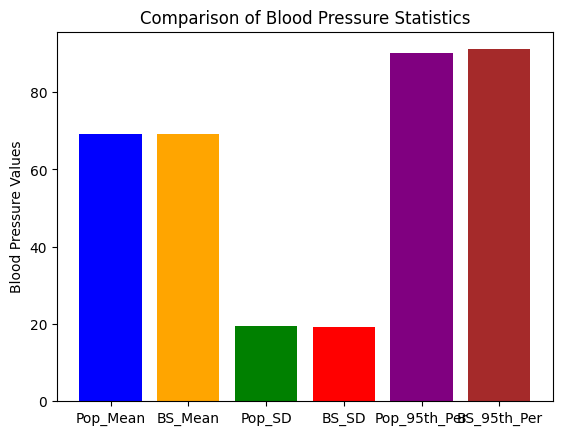

In [36]:
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Comparison of Blood Pressure Statistics')
plt.ylabel('Blood Pressure Values')
plt.show()


Note :  Here pop refers to population,BS refers to Bootstrap and Per refers to Percentile